In [59]:
# Preparing environment
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

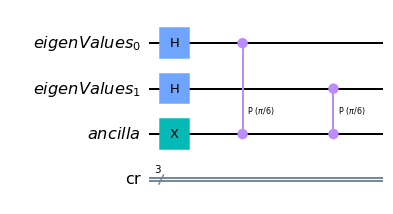

In [60]:
#Creating circuit
circuit = QuantumCircuit()

#Creating 2 quibit register to store eigenvalues
eigenValuesForU = QuantumRegister(2, 'eigenValues')

#Adding eigen value register to circuit
circuit.add_register(eigenValuesForU)

#Creating ancilla bit
anc = QuantumRegister(1, 'ancilla')

#Adding ancilla bit to register
circuit.add_register(anc)

#Adding classical register
cr = ClassicalRegister(3, "cr")
circuit.add_register(cr)

#Applying x gate to ancilla bit
circuit.x(anc[0])

#Applying h gates to both counting bits
circuit.h(eigenValuesForU[0])
circuit.h(eigenValuesForU[1])

#Performing controlled unitary operations

#This is CU
circuit.cp(math.pi/6, 0, 2);
circuit.cp(math.pi/6, 1, 2);

#Drawing output
circuit.draw(output='mpl')

In [61]:
#QFT Formula from https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html

def qft_dagger(qc, n):
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)
    return qc

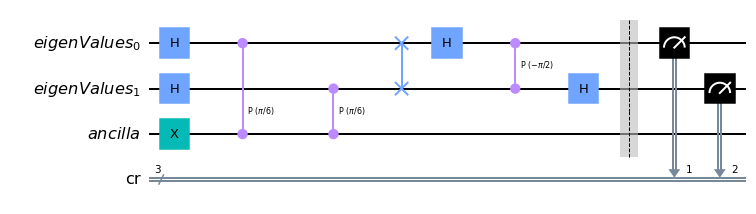

In [62]:
#Seperation between phase operation and circuit inverse
circuit.barrier()

#Creating a new circuit to store circuit inverse
circuit2 = qft_dagger(circuit, 2)

#Seperatiom bewteen circuit inverse and measurment of system
circuit2.barrier()

#Measuring system
circuit2.measure(0,1)
circuit2.measure(1,2)

#Drawing output
circuit2.draw(output='mpl')


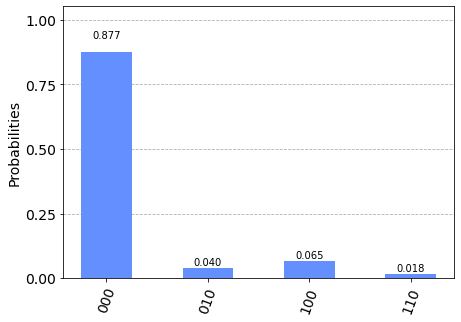

In [63]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(circuit2, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)